# Multi-class Classification 
This Matlab code has been completed as part of [Machine Learning](https://www.coursera.org/learn/machine-learning)
course in Coursera given by Prof. Andrew Ng

------------
This notebook demonstrates one-vs-all logistic regression and neural networks to recognize hand-written digits. 


This notebook includes:

- <a href='#part1'>Part 1: Loading and Visualizing Data</a>
- <a href='#part2'>Part 2: Vectorize Logistic Regression</a>
- <a href='#part3'>Part 3: Predict for One-Vs-All</a> 

This code requires the following functions
* <a href='#funcs_05_LogisticRegression_multiclass_lrCostFunction.m'>lrCostFunction.m</a> 
* <a href='#funcs_05_LogisticRegression_multiclass_displayData.m'>displayData.m</a>

### Part 1: Loading and Visualizing Data <a id='part1'></a>

The data includes 5000 training examples in ex3data1.mat, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix X. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image.

$$ X = \begin{bmatrix} --\left(x^{(1)}\right)^T --\\ --\left(x^{(2)}\right)^T -- \\ ... \\ --\left(x^{(m)}\right)^T -- \end{bmatrix}  \qquad \qquad \qquad Y = \begin{bmatrix} y^{(1)}\\ y^{(2)} \\ ... \\ y^{(m)} \end{bmatrix}$$

The second part of the training set is a 5000-dimensional vector y that
contains labels for the training set. To make things more compatible with
Octave/MATLAB indexing, where there is no zero index, we have mapped
the digit zero to the value ten. Therefore, a “0” digit is labeled as “10”, while
the digits “1” to “9” are labeled as “1” to “9” in their natural order.


In [15]:
%% Load Data and setup the parameters
load('./data/data_05_LogisticRegression_multiclass.mat'); % training data stored in arrays X, y
m = size(X, 1); % 5000 training samples
n = size(X,2);  % 400 (20x20) Input Images of Digits

num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

fprintf('\nTesting data: X[%.1d,%.1d]',size(X,1),size(X,2));
fprintf('\nTesting data: y[%.1d,%.1d]',size(y,1),size(y,2));

Testing data: X[5000,400]
Testing data: y[5000,1]

** Visualizing** : Randomly select 100 data points to display

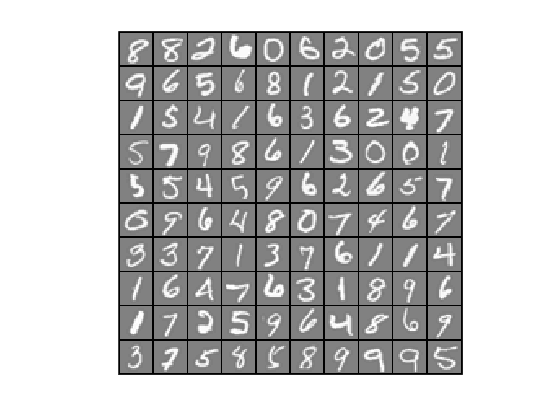

In [16]:
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);
funcs_05_LogisticRegression_multiclass_displayData(sel);

### Part 2: Vectorize Logistic Regression <a id='part2'></a>
This part demonstrates the use of multiple one-vs-all logistic regression models to build a multi-class classifier. Since there are 10 classes, we will need to train 10 separate logistic regression classifiers. 

Recall the cost function in regularized logistic regression:

$$J(\Theta)=\frac{1}{m}\sum_{i=1}^{m}\left[ -y^{(i)}log\left( h_{\theta}\left(x^{(i)}\right) \right) - \left(1-y^{(i)} \right)log\left( 1-h_{\theta}\left(x^{(i)}\right) \right)\right] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$$

To compute each element in the summation, we have to compute $h_{\theta} \left( x^{(i)} \right) = g \left( \theta^T x^{(i)} \right)$ for every example $x^{(i)}$. 

#### Vectorizing the cost function

As the first step in any regression model, ones are added to feature vectors:
$$ X^* = \begin{bmatrix} --1 --\\ -- X -- \end{bmatrix}  $$

The coefficients vector now also inludes the intercept $\Theta^* := [\theta_0 \:\: \Theta]^T$. Define $H_{\Theta}:=g(X^*\Theta^*) \in R^m$ . The vectorialized version of logistic regression's cost function can be written as: 

$$J(\Theta^*)=\frac{1}{m}\sum_{i=1}^{m}\left[ -y^{(i)} log\left( H_{\Theta}^{(i)} \right) -\left(1-y^{(i)} \right) log\left(1-H_{\Theta}^{(i)} \right) \right] + \frac{\lambda}{2m}\Theta^T \Theta$$


The gradient is computed as follows in the vectorialized form:

$$\frac{\partial J(\Theta^*)}{\partial \Theta}=\frac{1}{m} X^T\left(H_{\Theta}-Y\right) + \frac{\lambda}{m}\Theta$$

and for the intercept (remember **not** to regularize the parameter $\theta_0$):

$$\frac{\partial J(\Theta^*)}{\partial \theta_0}=\frac{1}{m}[1,1,...,1]\left(H_{\Theta}-Y\right)=\frac{1}{m}\left(H_{\Theta}-Y\right)$$

Finally; the gradient is:

$$ \frac{\partial J(\Theta^*)}{\partial \Theta^*} = \frac{1}{m}\begin{bmatrix} \left(H_{\Theta}-Y\right) \\ X^T\left(H_{\Theta}-Y\right) + \lambda\Theta \end{bmatrix}  $$

This cost function is computed as in subfunction <a href='#lrCostFunction.m'>funcs_05_LogisticRegression_multiclass_lrCostFunction.m</a>. 

#### One-vs-all Classification
The one-vs-all classification model is constructed by training multiple regularized logistic regression classifiers, one for each of the K=10 classes in the handwritten digits dataset. This code can be generalized for any value of K as well.

You should now complete the code in oneVsAll.m to train one classifier for each class. In particular, your code should return all the classifier parameters in a matrix $\Theta^{all} \in R^{K×(N +1)}$  , where each row of $\Theta^* \in R^{N+1}$ corresponds to the learned logistic regression parameters for one class. This can be done with a "for"-loop from 1 to K, training each classifier independently.

Note that the target vector Y is a vector of labels from 1 to 10, where we have mapped the digit "0" to the label 10 (to avoid confusions with indexing). When training the classifier for class $k \in \{1, ..., K\}$, the label vector $Y\in R^m$  is defined as: $y_j=1$ if j-th training instance belongs to class k, and $y_j=0$ otherwise. 

The one-vs-all classifier is demonstrated as follows. In this code,  *fmincg* is used instead of *fminunc*. *fmincg* works similarly to *fminunc*, but is more efficient for dealing with a large number of parameters. After having the code for oneVsAll.m, the following code will call the function and return the set of coefficients for classification task.

In [17]:
% NOTE: This training phase takes sometime (leading also to ipython coredump), so consider to do offline

% Define sigmoid function 
sigmoid=@(z) 1.0 ./ (1.0 + exp(-z));

% Regularization parameter
lambda = 0.1; 
 
% Initilize with zeros
theta_all = zeros(num_labels, n + 1);
 
% Add ones to the X data matrix
X_all = [ones(m, 1) X];
 
for class_id=1:num_labels
    initial_theta = theta_all(class_id,:)'; % theta should be column
    y_oneclass=zeros(size(y)); % set label to 1 or 0
    if class_id==0
        y_oneclass(y==10)=1; 
    else
        y_oneclass(y==class_id)=1;
    end

    % Set Options
    options = optimset('GradObj', 'on', 'MaxIter', 40);
    % Optimize
    [theta, J, exit_flag] = funcs_fmincg(@(t)(funcs_05_LogisticRegression_multiclass_lrCostFunction...
                                        (t, X_all, y_oneclass, lambda)), initial_theta, options);
    theta_all(class_id,:)=theta;
end

### Part 3: Predict for One-Vs-All <a id='part3'></a>
After training your one-vs-all classifier, one can now use it to predict the digit contained in a given image. For each input, one should compute the "probability" that it belongs to each class using the trained logistic regression classifiers. The one-vs-all prediction function will pick the class for which the corresponding logistic regression classifier outputs the highest probability and return the class label (1, 2,..., or K) as the prediction for the input example.

In [18]:
% possibility correspond to each class
prob=sigmoid(X_all*theta_all');
[~,pred]=max(prob,[],2);
    
fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);

Training Set Accuracy: 94.420000

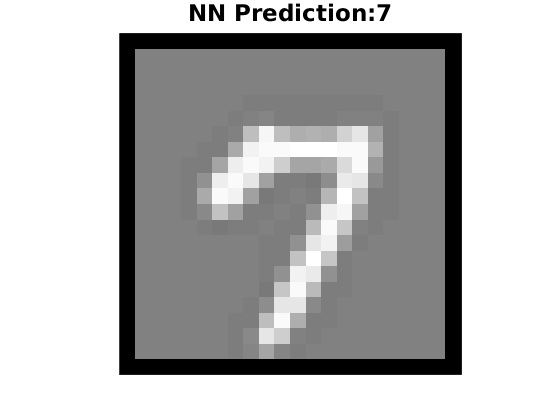

prob_xi =
  Columns 1 through 7
    0.0000    0.0000    0.0001    0.0000    0.0140    0.0000    0.7802
  Columns 8 through 10
    0.0001    0.4304    0.0051

In [19]:
% Randomly permute examples
rp = randperm(m);
xi=X_all(rp(1),:);

prob_xi=sigmoid(xi*theta_all')
[~,pred]=max(prob_xi,[],2);

funcs_05_LogisticRegression_multiclass_displayData(X(rp(1),:));
title(['NN Prediction:',num2str(mod(pred, 10))]);

##Required function

#### funcs_05_LogisticRegression_multiclass_lrCostFunction.m <a id='lrCostFunction.m'></a>

In [20]:
% function [J, grad] = funcs_05_LogisticRegression_multiclass_lrCostFunction(theta, X, y, lambda)
%     %LRCOSTFUNCTION Compute cost and gradient for logistic regression with 
%     %regularization
%     %   J = LRCOSTFUNCTION(theta, X, y, lambda) computes the cost of using
%     %   theta as the parameter for regularized logistic regression and the
%     %   gradient of the cost w.r.t. to the parameters. 
% 
%     % Define sigmoid function
%     sigmoid=@(z) 1./(1+exp(-z));
%     m = length(y); % number of training examples
%     HTheta=sigmoid(X*theta);
%     J = 1/m*sum(-y.*log(HTheta)-(1-y).*log(1-HTheta))+lambda/(2*m)*theta(2:end)'*theta(2:end);
%     
%     grad1=1/m*X(:,1)'*(HTheta-y); % dJ(theta)/dtheta_j,j=0
%     grad2=1/m*X(:,2:end)'*(HTheta-y)+lambda/m*theta(2:end); % dJ(theta)/dtheta_j,j>0
%     grad=[grad1; grad2];
% end

#### funcs_05_LogisticRegression_multiclass_displayData.m <a id='displayData.m'></a>

In [21]:
% function [h, display_array] = funcs_05_LogisticRegression_multiclass_displayData(X, example_width)
%     %DISPLAYDATA Display 2D data in a nice grid
%     %   [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data
%     %   stored in X in a nice grid. It returns the figure handle h and the 
%     %   displayed array if requested.
% 
%     % Set example_width automatically if not passed in
%     if ~exist('example_width', 'var') || isempty(example_width) 
%         example_width = round(sqrt(size(X, 2)));
%     end
% 
%     % Gray Image
%     colormap(gray);
% 
%     % Compute rows, cols
%     [m n] = size(X);
%     example_height = (n / example_width);
% 
%     % Compute number of items to display
%     display_rows = floor(sqrt(m));
%     display_cols = ceil(m / display_rows);
% 
%     % Between images padding
%     pad = 1;
% 
%     % Setup blank display
%     display_array = - ones(pad + display_rows * (example_height + pad), ...
%                            pad + display_cols * (example_width + pad));
% 
%     % Copy each example into a patch on the display array
%     curr_ex = 1;
%     for j = 1:display_rows
%         for i = 1:display_cols
%             if curr_ex > m, 
%                 break; 
%             end
%             % Copy the patch
% 
%             % Get the max value of the patch
%             max_val = max(abs(X(curr_ex, :)));
%             display_array(pad + (j - 1) * (example_height + pad) + (1:example_height), ...
%                           pad + (i - 1) * (example_width + pad) + (1:example_width)) = ...
%                             reshape(X(curr_ex, :), example_height, example_width) / max_val;
%             curr_ex = curr_ex + 1;
%         end
%         if curr_ex > m, 
%             break; 
%         end
%     end
% 
%     % Display Image
%     h = imagesc(display_array, [-1 1]);
% 
%     % Do not show axis
%     axis image off
% 
%     drawnow;
% end